# **KMeans**

In [5]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import AgglomerativeClustering

In [6]:
data = pd.read_excel('OnlineRetail.xlsx',nrows=2000)
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
1995,536551,22837,HOT WATER BOTTLE BABUSHKA,2,2010-12-01 14:34:00,4.65,17346.0,United Kingdom
1996,536551,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 14:34:00,2.95,17346.0,United Kingdom
1997,536551,22174,PHOTO CUBE,3,2010-12-01 14:34:00,1.65,17346.0,United Kingdom
1998,536551,22112,CHOCOLATE HOT WATER BOTTLE,1,2010-12-01 14:34:00,4.95,17346.0,United Kingdom


In [7]:
data=data.drop('InvoiceNo', axis='columns')
data=data.drop('StockCode', axis='columns')
data=data.drop('Description', axis='columns')
data=data.drop('InvoiceDate', axis='columns')
data=data.drop('CustomerID', axis='columns')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

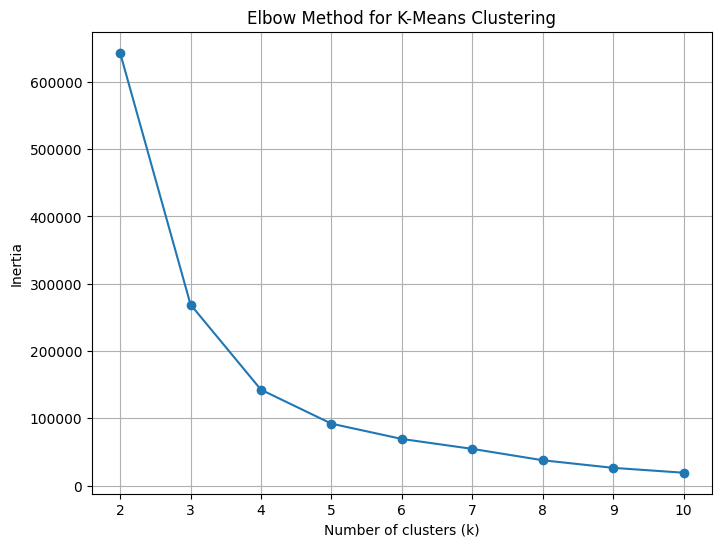

In [8]:
data = pd.DataFrame(data)
labencoder= LabelEncoder()
data['countryencoded'] = labencoder.fit_transform(data['Country'])
k_values = range(2, 11)
inertias = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data[['Quantity', 'countryencoded']])
    inertias.append(kmeans.inertia_)
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertias, 'o-')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.xticks(k_values)
plt.title("Elbow Method for K-Means Clustering")
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


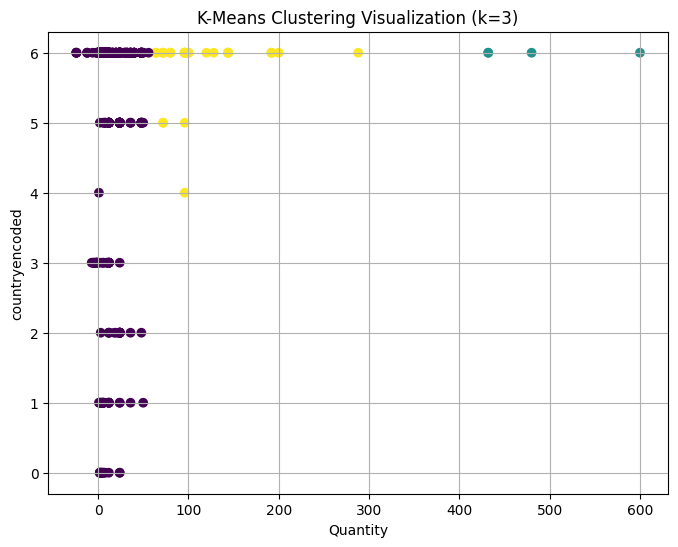

In [9]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(data[['Quantity', 'countryencoded']])
data['cluster'] = kmeans.labels_
plt.figure(figsize=(8, 6))
plt.scatter(data['Quantity'], data['countryencoded'], c=data['cluster'], cmap='viridis')
plt.title("K-Means Clustering Visualization (k=%d)" % optimal_k)
plt.xlabel('Quantity')
plt.ylabel('countryencoded')
plt.grid(True)
plt.show()

# **Agglomerative Clustering**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be

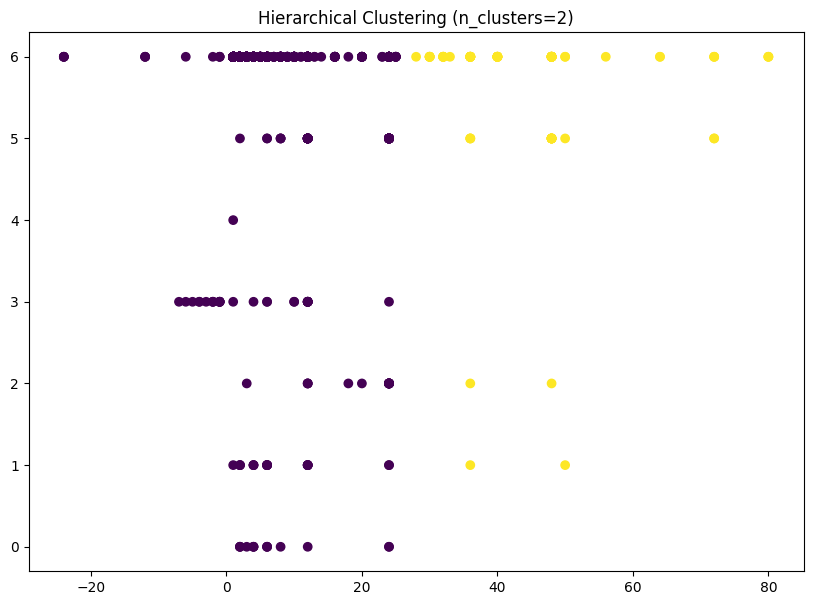

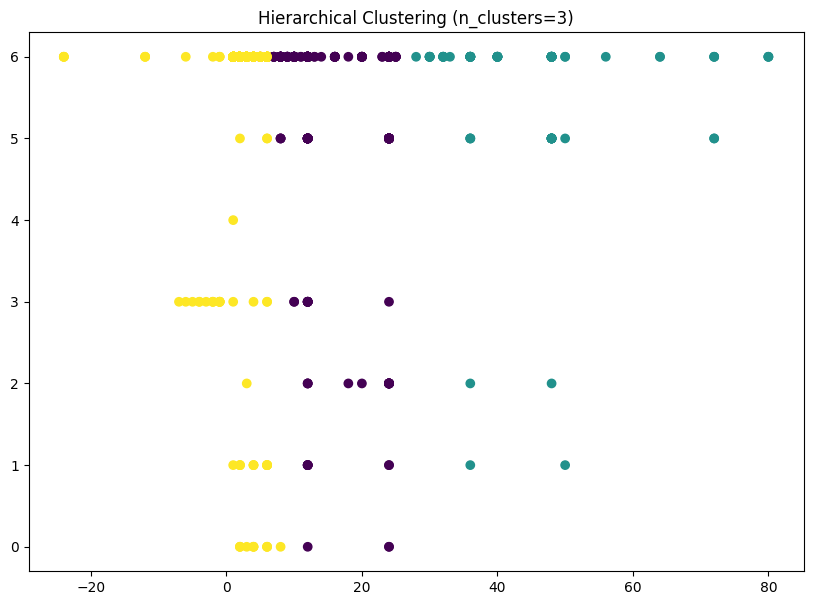

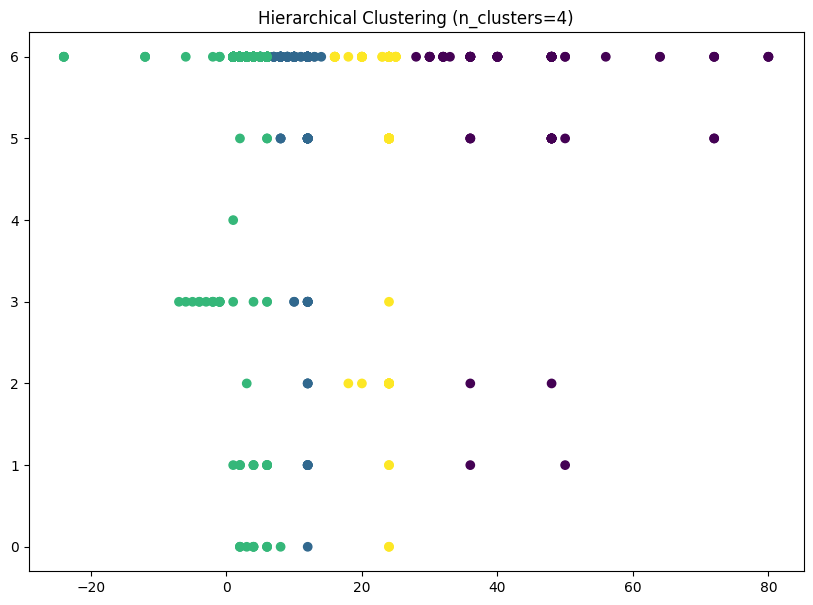

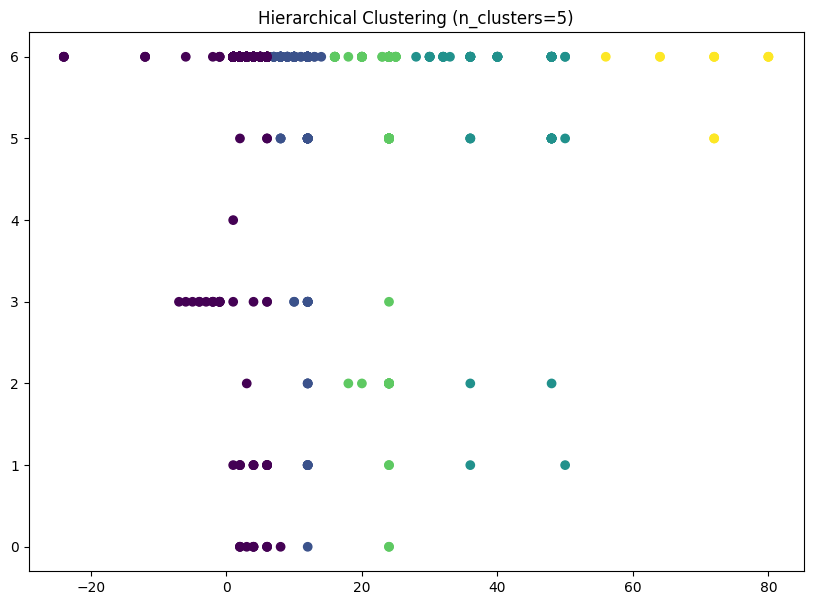

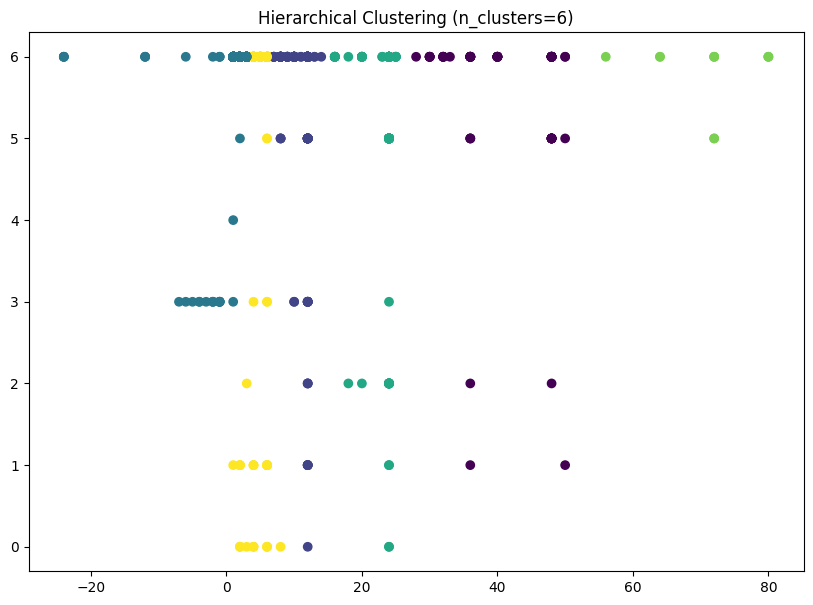

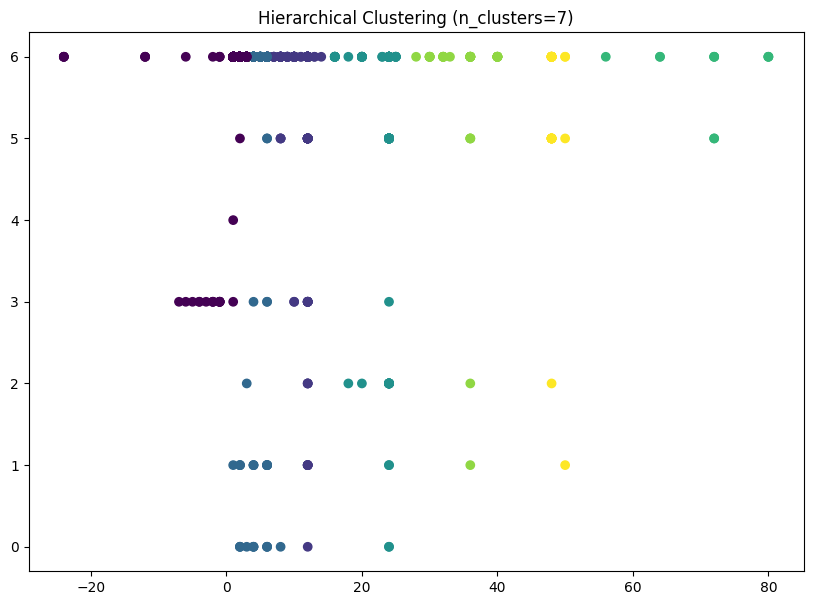

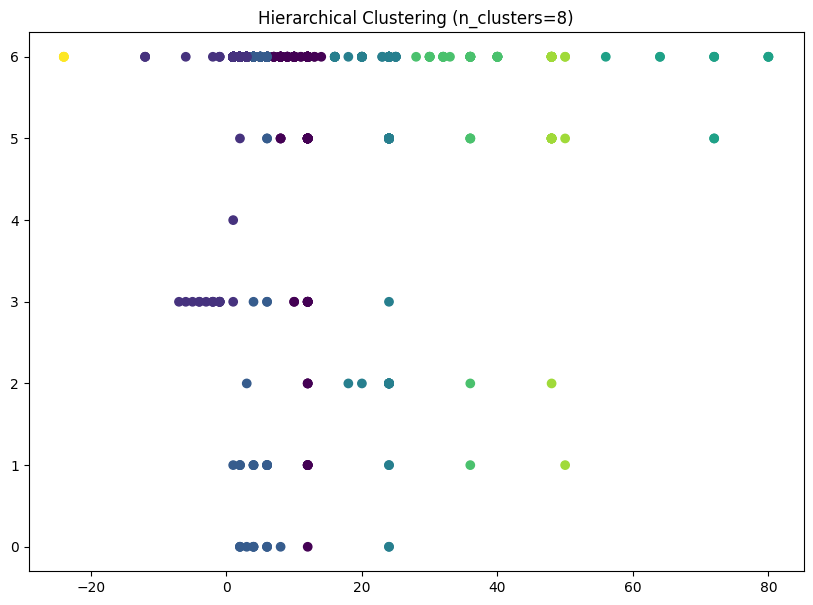

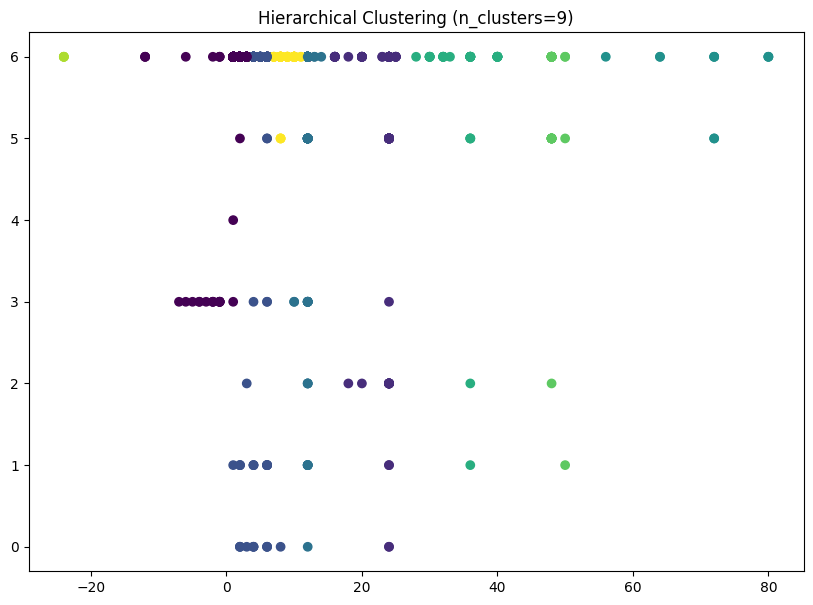

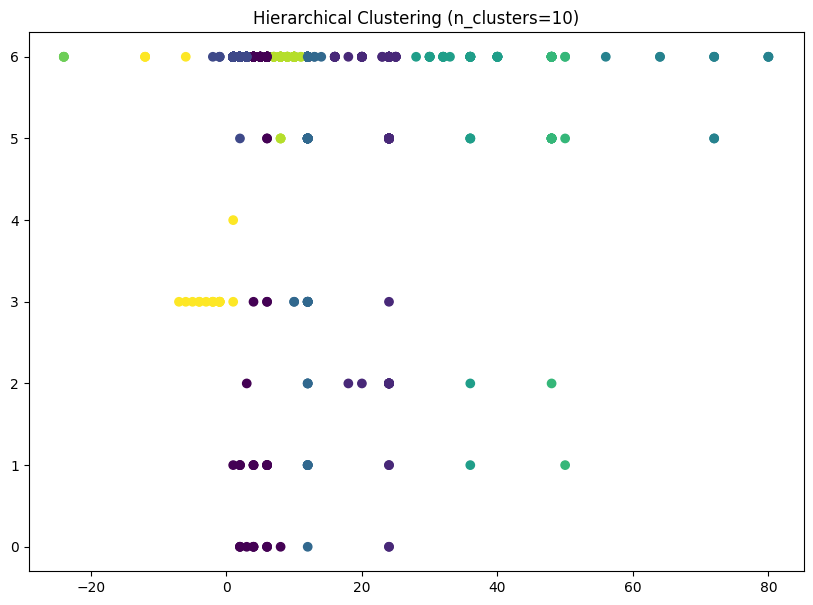

In [10]:
data = pd.DataFrame(data)
labencoder= LabelEncoder()
data['countryencoded'] = labencoder.fit_transform(data['Country'])
outlier_threshold = data['Quantity'].std() * 3
df_filtered = data[data['Quantity'] <= outlier_threshold]
cluster_results = {}
for num_clusters in range(2, 11):
    cluster = AgglomerativeClustering(n_clusters=num_clusters, affinity='euclidean', linkage='ward')
    cluster.fit(df_filtered[['Quantity','countryencoded']])
    cluster_results[num_clusters] = cluster.labels_
for num_clusters, labels in cluster_results.items():
    plt.figure(figsize=(10, 7))
    plt.scatter(df_filtered['Quantity'], df_filtered['countryencoded'], c=labels)
    plt.title(f'Hierarchical Clustering (n_clusters={num_clusters})')
    plt.show()

# **ANALYSIS**

In [11]:
# Agglomerative Clustering is giving much better results as compared to KMeans. As it can be seen above in the plots that Agglomerative is making much better, defined and distinct clusters.